# Word Count

In [4]:
import os

with open(os.path.join('data','hamlet.txt'),'r') as infile:
    hamlet = infile.read()

## Standard Python

In [5]:
import re

words = re.split('\W+', hamlet.lower().strip())
print words[:10]

['hamlet', 'dramatis', 'personae', 'claudius', 'king', 'of', 'denmark', 'king', 'claudius', 'hamlet']


In [6]:
words = filter(lambda x: len(x)>2, words)
print words[:10]

['hamlet', 'dramatis', 'personae', 'claudius', 'king', 'denmark', 'king', 'claudius', 'hamlet', 'son']


In [7]:
wc = dict()

def add_to_dic(word):
    wc[word] = wc.get(word,0) + 1

# map the words
map(add_to_dic, words)

#sort by frequency
top_words = sorted(wc.items(), key=lambda x: x[1], reverse=True)[:15]

In [8]:
top_words

[('the', 930),
 ('and', 843),
 ('you', 496),
 ('hamlet', 368),
 ('that', 346),
 ('lord', 278),
 ('not', 262),
 ('his', 238),
 ('this', 238),
 ('with', 232),
 ('but', 232),
 ('for', 215),
 ('your', 211),
 ('what', 186),
 ('king', 171)]

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(words):
    values = map(lambda x: x[1], words)
    labels = map(lambda x: x[0], words)
    plt.barh(range(len(values)), values, color='grey')
    plt.yticks(range(len(values)), labels)
    plt.show()

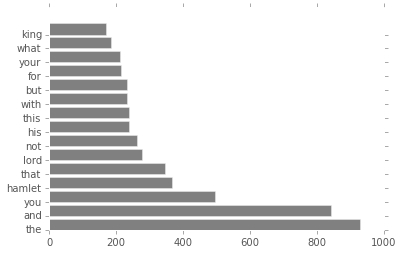

In [10]:
plot(top_words)

## Spark

In [11]:
from pyspark import  SparkContext

sc = SparkContext( 'local[4]', 'pyspark')

In [13]:
words = sc.textFile(os.path.join('data','hamlet.txt'))
words.take(5)

[u'\tHAMLET', u'', u'', u'\tDRAMATIS PERSONAE', u'']

In [14]:
hamlet = words.flatMap(lambda line: re.split('\W+', line.lower().strip()))
hamlet.take(5)

[u'hamlet', u'', u'', u'dramatis', u'personae']

In [15]:
tmp = hamlet.filter(lambda x: len(x) > 2 )
print tmp.take(5)

[u'hamlet', u'dramatis', u'personae', u'claudius', u'king']


In [16]:
tmp = tmp.map(lambda word: (word, 1))
tmp.take(5)

[(u'hamlet', 1),
 (u'dramatis', 1),
 (u'personae', 1),
 (u'claudius', 1),
 (u'king', 1)]

In [17]:
tmp = tmp.reduceByKey(lambda a, b: a + b)
tmp.take(5)

[(u'stones', 1), (u'damon', 1), (u'liar', 1), (u'nunnery', 5), (u'crowing', 1)]

In [18]:
tmp = tmp.map(lambda x: (x[1], x[0])).sortByKey(False)
tmp.take(20)

[(930, u'the'),
 (843, u'and'),
 (496, u'you'),
 (368, u'hamlet'),
 (346, u'that'),
 (278, u'lord'),
 (262, u'not'),
 (238, u'this'),
 (238, u'his'),
 (232, u'with'),
 (232, u'but'),
 (215, u'for'),
 (211, u'your'),
 (186, u'what'),
 (171, u'king'),
 (160, u'him'),
 (149, u'have'),
 (134, u'will'),
 (124, u'polonius'),
 (112, u'horatio')]

In [19]:
tmp = tmp.map(lambda x: (x[1], x[0]))
tmp.take(20)

[(u'the', 930),
 (u'and', 843),
 (u'you', 496),
 (u'hamlet', 368),
 (u'that', 346),
 (u'lord', 278),
 (u'not', 262),
 (u'this', 238),
 (u'his', 238),
 (u'with', 232),
 (u'but', 232),
 (u'for', 215),
 (u'your', 211),
 (u'what', 186),
 (u'king', 171),
 (u'him', 160),
 (u'have', 149),
 (u'will', 134),
 (u'polonius', 124),
 (u'horatio', 112)]

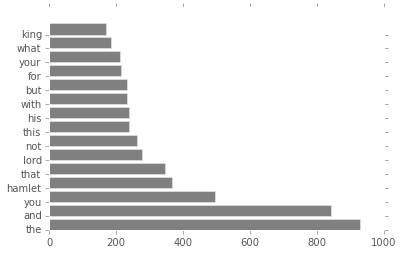

In [20]:
plot(tmp.take(15))

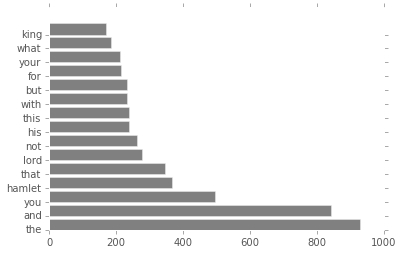

In [21]:
plot(top_words)

## Summary code

In [72]:
words = sc.textFile('hamlet.txt')\
        .flatMap(lambda line: re.split('\W+', line.lower().strip()))\
        .filter(lambda x: len(x) > 2 )\
        .map(lambda word: (word, 1))\
        .reduceByKey(lambda a, b: a + b)\
        .map(lambda x: (x[1], x[0])).sortByKey(False)   

words.take(15)

[(930, u'the'),
 (843, u'and'),
 (496, u'you'),
 (368, u'hamlet'),
 (346, u'that'),
 (278, u'lord'),
 (262, u'not'),
 (238, u'his'),
 (238, u'this'),
 (232, u'with'),
 (232, u'but'),
 (215, u'for'),
 (211, u'your'),
 (186, u'what'),
 (171, u'king')]

## Text filtering

In [24]:
hamlet = os.path.join('data','hamlet.txt')
words = sc.textFile(hamlet)

How many lines contains <em>hamlet</em>?

In [25]:
tmp = words.filter(lambda x: "hamlet" in x.lower())
tmp.count()

367

As a percent?

In [26]:
'{0:0.2f}%'.format(100*tmp.count()/float(words.count()))

'7.26%'

How about <em>claudius</em> and <em>hamlet</em>?

In [27]:
tmp.filter( lambda x: 'claudius' in x.lower()).count()

12

In [28]:
tmp.filter( lambda x: 'claudius' in x.lower()).collect()

[u'\t[Enter KING CLAUDIUS, QUEEN GERTRUDE, HAMLET,',
 u"KING CLAUDIUS\tThough yet of Hamlet our dear brother's death",
 u"KING CLAUDIUS\t'Tis sweet and commendable in your nature, Hamlet,",
 u'KING CLAUDIUS\tHow fares our cousin Hamlet?',
 u'KING CLAUDIUS\tI have nothing with this answer, Hamlet; these words',
 u'KING CLAUDIUS\tWhat, Gertrude? How does Hamlet?',
 u"KING CLAUDIUS\tNow, Hamlet, where's Polonius?",
 u'KING CLAUDIUS\tHamlet, this deed, for thine especial safety,--',
 u'KING CLAUDIUS\tAy, Hamlet.',
 u'KING CLAUDIUS\tThy loving father, Hamlet.',
 u'KING CLAUDIUS\tFrom Hamlet! who brought them?',
 u"KING CLAUDIUS\t'Tis Hamlets character. 'Naked!"]